<a href="https://colab.research.google.com/github/yunjeong-chang/My_Data_project/blob/main/%EB%8D%B0%EC%9D%B4%EC%BD%98/%ED%87%B4%EA%B7%BC%EC%8B%9C%EA%B0%84%20%EB%B2%84%EC%8A%A4%20%EC%8A%B9%EC%B0%A8%EC%9D%B8%EC%9B%90%20%EC%98%88%EC%B8%A1_%EA%B0%80%EC%9D%B4%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **03장. 퇴근시간 버스 승차인원 예측**

## **3.1 문제 정의**

### **3.1.1 경진대회 소개**

- **목적** : 제주도의 교통체증 문제 해결       
- **해결 방법** : 효율적인 버스 운행으로 교통체증을 해결하기 위해, 퇴근시간 버스 승차인원 예측



### **3.1.2 평가척도**

- 지도학습 중 **회귀(Regression)**문제

- 회귀 문제의 평가 척도 : **RMSE(Root Mean Square Error, 제곱근평균제곱오차)**

### **3.1.3 문제 해결을 위한 접근 방식**

**<주의할 점>**

1. 오전 시간(6:00 ~ 12:00) 데이터로 퇴근 시간(16:00 ~ 20:00)의 버스 승차 인원을 예측해야 함.
2. 9월 1일 ~ 9월 30일 한 달간의 데이터로 10월 1일 ~ 10월 15일의 퇴근 시간 버스 승차 인원을 예측해야 함.

**<권장 사항>**

**: 책에 있는 내용 부터 공부하시면 양도 많고, 귀찮게 하는 것들이 많아서 어렵게 느끼실 수 있을 것 같습니다.** 

  **베이스라인 코드를 먼저 보시고 큰 흐름에서 무엇을 하는 문제인지 익숙해 진 후에, 1등 코드에 대한 공부를 이어 나가는 것을 추천 드립니다.**

- [베이스라인 초급 코드](https://dacon.io/competitions/official/229255/codeshare/709?page=1&dtype=recent)

- [베이스라인 중급 코드](https://dacon.io/competitions/official/229255/codeshare/710?page=1&dtype=recent)

### **3.1.4 분석환경 구축**

※ 데이터 불러올 때 **드라이브 마운트** 사용 ※

1. 데이콘 사이트에서 받을 수 있는 5개의 데이터 : **train.csv**, **test.csv**, **bus_bts.csv**, **submission_sample.csv**, **행정_법정동 중심좌표.xlsx**

2. 1등 팀이 사용한 외부 데이터 : [따로 받아야 함](https://github.com/sk8erchoi/dacon/tree/master/ch03) (가이드에서는 내부 데이터만 다루겠습니다! 책 보고 외부 데이터 추가해서도 해보세요😊 )



In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3장-퇴근시간 버스 승차인원 예측/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3장-퇴근시간 버스 승차인원 예측/test.csv')
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3장-퇴근시간 버스 승차인원 예측/submission_sample.csv')

bts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3장-퇴근시간 버스 승차인원 예측/bus_bts.csv')

## **3.2 탐색적 데이터 분석**

### **3.2.1 데이터 설명**

In [ ]:
train.head(3)
# id
# date : 날짜
# bus_route_id : 버스 노선 id
# in_out : 시내/시외 버스 구분
# station_code : 해당 승하차 정류소의 id
# station_name : 해당 승하차 정류소의 이름
# latitude : 해당 버스 정류장의 위도
# longitude : 해당 버스 정류장의 경도
# [x]~[y]_ride : 해당 시간대별 승차 인원수
# [x]~[y]_takeoff : 해당 시간대별 하차 인원수

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
train.info() #총 415,423개의 행

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

In [ ]:
# 버스 카드별 승하차 정보
bts.head(3)

# user_card_id : 해당 승객의 버스 카드 id
# bus_route_id : 버스 노선 id
# vhc_id : 버스 차량 id

# geton_date : 해당 승객이 탑승한 날짜
# geton_time : 해당 승객이 탑승한 시간
# geton_station_code : 승차 정류소의 id
# geton_station_name : 승차 정류소의 이름

# getoff_date : 해당 승객이 하차한 날짜
# getoff_time : 해당 승객이 하차한 시간
# getoff_station_code : 하차 정류소의 id
# getoff_station_name : 하차 정류소의 이름

# user_category : 승객 구분
# user_count : 해당 버스 카드로 계산한 인원수

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1


In [ ]:
#bts.info(null_counts=True) # getoff에 관한 결측치 : 승객이 하차 태그를 하지 않으면 발생

### **3.2.2 데이터 시각화**

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 내부에 결과를 출력하도록 설정
%matplotlib inline

# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False) 

# 분석에 문제가 없는 경고 메세지는 숨긴다.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 학습 데이터의 훼손을 막기 위한 복사본 생성
traindata = train.copy()

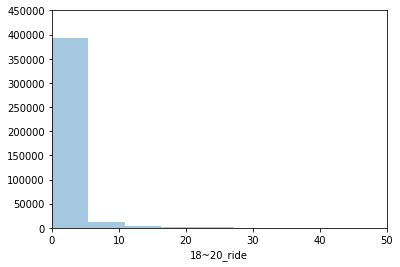

In [ ]:
# 타겟 변수(퇴근 시간 승차 인원) 분포 시각화
sns.distplot(traindata['18~20_ride'], kde = False, bins = 50)
plt.axis([0, 50, 0, 450000]) # [x 축 최솟값, x 축 최댓값, y 축 최솟값, y 축 최댓값]
plt.show() 
# 퇴근 시간 승차 인원이 0~5명 구간에 대부분 존재

In [ ]:
# 0~5 사이에 값이 얼마나 분포되어있는지 확인
traindata.groupby('18~20_ride').size().head(6) 
# 학습 데이터 타겟 변수의 값 절반 이상이 0이다!!

18~20_ride
0.0    296528
1.0     44268
2.0     23752
3.0     13560
4.0      8630
5.0      5911
dtype: int64

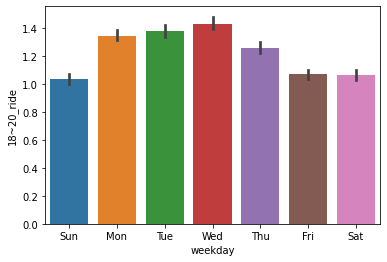

In [ ]:
# 데이터에 날짜와 관련된 변수가 있으면 날짜형으로 바꿔주는 것이 좋다!

# 날짜형으로 변환
traindata['date'] = pd.to_datetime(traindata['date'])
# 요일을 문자형으로 추출해 변수 생성
traindata['weekday'] = traindata['date'].dt.strftime('%a')

# 요일별 퇴근 시간 평균 탑승객 수 시각화
sns.barplot(x="weekday", y="18~20_ride", data=traindata)
plt.show()
# 월~수 까지 퇴근시간 승차인원 증가하다가, 목요일부터는 감소하는 추세

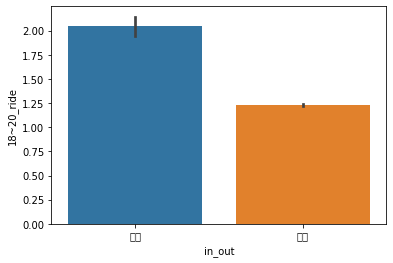

In [ ]:
# 버스 종류별 퇴근 시간 평균 탑승객 수 시각화
sns.barplot(x="in_out", y="18~20_ride", data=traindata)
plt.show()

In [ ]:
# 일별 출퇴근 시간의 총 승차 인원 데이터 생성
# 출근시간(8시~10시)과 퇴근시간(18시~20시)에 탑승객 수가 어떤 양상을 띄는지 확인
# 출근시간 8~9시와 9~10시 데이터 합치기

traindata['8~10_ride'] = traindata['8~9_ride'] + traindata['9~10_ride']
eda_data = traindata.groupby('date')[['18~20_ride','8~10_ride']].agg('sum').reset_index()

eda_data.head(3)

,date,18~20_ride,8~10_ride
0,2019-09-01,11537.0,11957.0
1,2019-09-02,20561.0,21844.0
2,2019-09-03,19743.0,25756.0


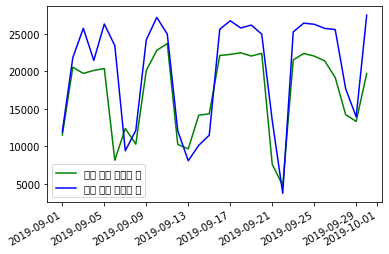

In [ ]:
# 일별 출퇴근 시간 탑승객 수 시각화
plt.plot("date", "18~20_ride", "g-", label = "퇴근 시간 탑승객 수", data=eda_data)
plt.plot("date", "8~10_ride", "b-", label = "출근 시간 탑승객 수", data=eda_data)
plt.gcf().autofmt_xdate() # x축의 라벨이 서로 겹치지 않도록 설정
plt.legend(loc=0) # 그래프 상에서 최적의 위치에 범례 표시

plt.show()
# 일별로 패턴이 있는 시계열 자료
# 출근 시간 탑승객 수 > 퇴근 시간 탑승객 수

## **3.3 데이터 전처리**

In [ ]:
# 학습 데이터와 테스트 데이터를 구분하기 위한 변수 생성
train['cue'] = 0
test['cue'] = 1

# 학습 데이터와 테스트 데이터 통합
df = pd.concat([train, test], axis=0)

### **3.3.1 내부 데이터를 통한 변수 생성**

In [ ]:
# 1. 요일을 나타내는 weekday 변수 생성

# datetime 변수형으로 변환
df['date'] = pd.to_datetime(df['date'])
# 요일 추출 (0:월요일 ~ 6:일요일)
df['weekday'] = df['date'].dt.weekday

df[['weekday']].head(3)

,weekday
0,6
1,6
2,6


In [ ]:
# 2. 요일과 함께 해당 요일의 평균 탑승객 수라는 정보가 더해지면 모델이 요일별 특성을 잘 학습할 수 있을 것!!

# 요일별 평균 탑승 승객수를 구하는 함수
def week_mean() :
    # 전체 데이터에서 train 데이터에 해당하는 행 추출
    train_data = df.query('cue=="0"').reset_index(drop=True)
    
    # 일괄적으로 1의 값을 가지는 'weekdaymean'변수 생성
    df['weekdaymean'] = 1

    # 각 요일에 해당하는 인덱스 추출
    index0 = df.query('weekday==0').index
    index1 = df.query('weekday==1').index
    index2 = df.query('weekday==2').index
    index3 = df.query('weekday==3').index
    index4 = df.query('weekday==4').index
    index5 = df.query('weekday==5').index
    index6 = df.query('weekday==6').index

    # 인덱스를 활용하여 'weekdaymean'의 값을 각 요일에 맞는 평균 탑승 승객수로 변경 
    df.iloc[index0,-1] = train_data.query('weekday==0')['18~20_ride'].mean()
    df.iloc[index1,-1] = train_data.query('weekday==1')['18~20_ride'].mean()
    df.iloc[index2,-1] = train_data.query('weekday==2')['18~20_ride'].mean()
    df.iloc[index3,-1] = train_data.query('weekday==3')['18~20_ride'].mean()
    df.iloc[index4,-1] = train_data.query('weekday==4')['18~20_ride'].mean()
    df.iloc[index5,-1] = train_data.query('weekday==5')['18~20_ride'].mean()
    df.iloc[index6,-1] = train_data.query('weekday==6')['18~20_ride'].mean()
    
    return df

# 함수를 실행하여 변수 생성
df = week_mean()

df[['weekdaymean']].head(3)

,weekdaymean
0,1.034282
1,1.034282
2,1.034282


In [ ]:
# 3. 시내/시외 버스 종류와 함께 버스 종류별 평균 탑승객 수라는 정보가 더해진다면 버스 종류별 특성을 잘 나타낼 수 있을 것!!

# 버스 종류별 평균 탑승 승객수를 구하는 함수
def inout_mean() :
    # 전체 데이터에서 train 데이터에 해당하는 행 추출
    train_data = df.query('cue=="0"').reset_index(drop=True)
    
    # 일괄적으로 1의 값을 가지는 in_out_mean 변수 생성
    df['in_out_mean'] = 1

    # 버스 종류별 인덱스 추출
    in_index = df.query('in_out == "시내"').index # 시내버스
    out_index = df.query('in_out == "시외"').index # 시외버스

    # 인덱스를 활용하여 in_out_mean의 값을 각 버스 종류에 맞는 
    # 평균 탑승 승객수로 변경
    df.iloc[in_index,-1] = train_data.query('in_out == "시내"')['18~20_ride'].mean()
    df.iloc[out_index,-1] = train_data.query('in_out == "시외"')['18~20_ride'].mean()
    
    return df

# 함수를 실행하여 변수 생성
df = inout_mean()

df[['in_out_mean']].head(3)

,in_out_mean
0,2.044345
1,2.044345
2,2.044345


In [ ]:
# 4. 일별 출근시간 탑승객 수와 퇴근시간 탑승객 수가 비슷한 양상을 띄는 것을 확인했으니 -> 이를 확장해서 일별 오전 시간대의 탑승객 수를 이용하자!!

# 날짜별 오전시간에 탑승한 총 승객수
f=df.groupby('date')['6~7_ride','7~8_ride','8~9_ride','9~10_ride','10~11_ride'].sum().reset_index()

# 변수명 바꾸기
f.columns=['date','6~7_ride_sum','7~8_ride_sum','8~9_ride_sum','9~10_ride_sum','10~11_ride_sum']

# 기존의 데이터프레임에 새로운 변수를 병합
df = pd.merge(df, f, how='left', on='date')

df[['date','6~7_ride_sum','7~8_ride_sum','8~9_ride_sum','9~10_ride_sum', '10~11_ride_sum']].head(3)

,date,6~7_ride_sum,7~8_ride_sum,8~9_ride_sum,9~10_ride_sum,10~11_ride_sum
0,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0
1,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0
2,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0


**<도메인 조사를 통한 변수 생성>**

In [ ]:
''' 너무 오래 걸리네요 ㅎ....ㅎ.. 시간 여유있게 잡고 한 번 해보시고 저는 우선 생략하고 가보겠습니다...
# 1. 배차 간격
# 탑승 날짜를 datetime형으로 변환
bts['geton_time2'] = pd.to_datetime(bts['geton_time'])

# 탑승 날짜, 탑승 정류장 코드, 탑승 노선 번호 기준으로 정렬
f = bts.sort_values(by=['geton_date','geton_station_code','bus_route_id', 'geton_time2'],ascending=True).reset_index()

# 반복문 실행 시간이 많이 소요되어 상태 진행률을 확인할 수 있는 tqdm 라이브러리 사용
from tqdm import notebook

# 시차를 넣기 위한 빈 리스트 생성
interval_lst = []
for i in notebook.tqdm(range(0,len(f)-1)):
    # 탑승 날짜, 탑승 정류장 코드, 탑승 노선 번호가 같다면
    if ((f.iloc[i].geton_date == f.iloc[i+1].geton_date) & (f.iloc[i].geton_station_code == f.iloc[i+1].geton_station_code) & (f.iloc[i].bus_route_id == f.iloc[i+1].bus_route_id)):
        # 탑승 날짜의 차를 interval_lst에 넣기
        interval_lst.append(f.iloc[i+1].geton_time2 - f.iloc[i].geton_time2)
    else:
       # 같지 않다면 0을 interval_lst에 넣기
        interval_lst.append(0)

interval_lst.insert(0, '0')

f['interval'] = interval_lst # interval_lst를 'interval'변수로 생성 
# 'interval' 변수의 값을 문자형으로 변환 후 '시:분:초'의 형태로 변환
f['interval'] = f['interval'].astype(str).str[7:].replace('','00:00:00')
f['bus_route_id'] = f['bus_route_id'].astype(object)

# 분으로 변환하는 함수
def get_min(time_str):
    h, m, s = time_str.split(':')
    return (int(h) * 3600 + int(m) * 60 + int(s)) / 60
# 'interval' 함수의 모든 값에 대해 함수 적용하여 나온 값을 time리스트에 넣기
time = []
for i in f['interval'] :
    time.append(get_min(i))

f['time'] = time # time리스트를 'time' 변수로 생성
f['time'] = f['time'].astype(int) # 'time' 변수를 int 타입으로 변경
f = f[f['time'] > 3] # 간격이 3분보다 작은 것 제외 
f = f[f['time'] < 180] # 간격이 3시간보다 큰 것 제외

# 버스 노선별 버스 간격의 평균 'bus_interval’변수 생성
data = f.groupby('bus_route_id')['time'].agg([('bus_interval', 'mean')]).reset_index()
data['bus_interval'] = data['bus_interval'].astype(int)

# 변수 생성에 많은 시간이 소요되므로 csv 파일로 저장
data.to_csv('bus_interval.csv', index = False)

'''

In [ ]:
# 2. school 변수 생성 (수요가 많을 것으로 예상되는 정류장)

# 정류장명에 '고등학교'가 포함되어 있는 행 뽑기 
highschool_station = df[df['station_name'].str.contains('고등학교')]
# '고등학교'가 포함되어 있는 정류장명을 중복 없이 리스트에 저장
highschool = list(highschool_station['station_name'].unique())
# 정류장명에 '대학교'가 포함되어 있는 행 뽑기
university_station = df[df['station_name'].str.contains('대학교')]
# '대학교'가 포함되어 있는 정류장명을 중복 없이 리스트에 저장
university = list(university_station['station_name'].unique())

# '고등학교'와 '대학교' 근처 정류장 구분 함수
def schoolstation(x):
    # highschool 리스트에 정류장명이 포함되어 있다면 1을 반환
    if x in highschool:
        return 1
    # university 리스트에 정류장명이 포함되어 있다면 1을 반환
    elif x in university:
        return 1
    # 둘 다 포함되지 않는 정류장명이라면 0을 반환
    else:
        return 0

# 모든 정류장명에 대해 적용
df['school'] = df['station_name'].apply(schoolstation)

df[['school']].head(3)

,school
0,0
1,0
2,0


In [ ]:
# 3. transfer 변수 생성 (수요가 많을 것으로 예상되는 정류장)

# school 변수와 동일한 방법으로 transfer 변수 생성
transfer_station = df[df['station_name'].str.contains('환승')]
transfers = list(transfer_station['station_name'].unique())

airport_station = df[df['station_name'].str.contains('공항')]
airport = list(airport_station['station_name'].unique())

terminal_station = df[df['station_name'].str.contains('터미널')]
terminal = list(terminal_station['station_name'].unique())

# 항상 수요가 많은 정류장 구분 함수
def transfer_station(x):
    if x in transfers:
        return 1
    elif x in airport:
        return 1
    elif x in terminal:
        return 1
    else:
        return 0

df['transfer'] = df['station_name'].apply(transfer_station)

df[['transfer']].head(3)

,transfer
0,0
1,0
2,0


In [ ]:
# 4. 연휴는 승차 인원에 영향을 줄 수 있으므로 holiday 변수 생성!

# 날짜에서 연휴 구분 함수
def holiday(x):
    # 공휴일이라면 1을 반환
    if x in ['2019-09-12','2019-09-13','2019-09-14','2019-10-03','2019-10-09']:
        return 1
    else:
        # 공휴일이 아니라면 0을 반환
        return 0

    # 모든 날짜에 적용
df['holiday'] = df['date'].apply(holiday)
df[['holiday']].head(3)

,holiday
0,0
1,0
2,0


In [ ]:
# 5. 승하차 시간대 통합 변수

# 오전 시간대에 2시간 동안 승차한 인원수의 합계
df['68a'] = df['6~7_ride'] + df['7~8_ride'] 
df['810a'] = df['8~9_ride'] + df['9~10_ride']
df['1012a'] = df['10~11_ride'] + df['11~12_ride']

# 오전 시간대에 2시간 동안 하차한 인원수의 합계
df['68b'] = df['6~7_takeoff'] + df['7~8_takeoff'] 
df['810b'] = df['8~9_takeoff'] + df['9~10_takeoff']
df['1012b'] = df['10~11_takeoff'] + df['11~12_takeoff']

df[['68a', '810a', '1012a', '68b', '810b', '1012b']].head(3)

,68a,810a,1012a,68b,810b,1012b
0,1.0,7.0,8.0,0.0,0.0,0.0
1,5.0,6.0,11.0,0.0,0.0,0.0
2,2.0,2.0,0.0,0.0,0.0,0.0


In [ ]:
# 6. 오전 시간의 승객 수

# 오전 시간(6시~12시)에 승차한 승객 수의 합계
df['ride_sum'] = df[['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', 
                     '10~11_ride', '11~12_ride']].sum(axis=1)

# 오전 시간(6시~12시)에 하차한 승객 수의 합계
df['takeoff_sum'] = df[['6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff']].sum(axis=1)

df[['ride_sum', 'takeoff_sum']].head(3)

,ride_sum,takeoff_sum
0,16.0,0.0
1,22.0,0.0
2,4.0,0.0


In [ ]:
# 7. 위에서 만든 변수에 '노선' 기준을 추가하여 '노선별 오전 시간대의 총, 평균 탑승객 수 구하기'

# 'bus_route_id'와 'station_code'를 결합해 route_station 생성
df['route_station'] = df['bus_route_id'].astype(str) + ',' \
                    + df['station_code'].astype(str)

# 버스노선별 오전시간의 총 승객수와 평균 승객수 구하기
data = df.groupby(['route_station'])['1012a'].agg({'sum', 'mean'}).reset_index()

# 변수명을 route_station, 1012a_mean, 1012a_sum으로 바꾸기
data.rename(columns = {'mean':'1012a_mean', 'sum':'1012a_sum'}, inplace=True)

# 기존의 데이터프레임에 새로운 변수를 병합
df = pd.merge(df, data, how='left', on='route_station')

df[['1012a_mean','1012a_sum']].head(3)

,1012a_mean,1012a_sum
0,5.304348,244.0
1,11.608696,534.0
2,2.304348,106.0


In [ ]:
# 8. 카테고리별 승객 수의 합
def category_people():
    # df와 병합을 위해 bus_route_id의 타입을 str로 변환
    bts['bus_route_id'] = bts['bus_route_id'].astype(str)

    # bus_route_id와 user_category별 승객 수의 합
    f = bts.groupby(
        ['bus_route_id','user_category']
    )['user_count'].agg([('승객수', 'sum')]).reset_index()

    # bus_route_id별 user_category 변수의 승객수의 피벗 테이블 형태로 변환
    g = pd.pivot_table(f, values='승객수', index='bus_route_id', 
                       columns='user_category', fill_value=0).reset_index()
    g.columns = ['bus_route_id', 'adult','kids','teen','elder','jang','jang2','ugong','ugong2']
    g = g[['bus_route_id', 'adult','kids','teen','elder']]

    # 기존의 데이터프레임에 새로운 변수를 병합
    merge_data = pd.merge(df, g, how='left', on='bus_route_id')
                 
    return merge_data

# bus_route_id의 타입을 str로 통일시켜준 뒤, 함수를 실행하여 변수 생성
df['bus_route_id'] = df['bus_route_id'].astype(str)
df = category_people()

df[['adult','kids','teen','elder']].head(3)

,adult,kids,teen,elder
0,8158.0,72.0,38.0,0.0
1,8158.0,72.0,38.0,0.0
2,8158.0,72.0,38.0,0.0


In [ ]:
# 9. 카테고리별 승객 비율
def category_people_ratio() :

    # bus_route_id별 user_category의 전체 합
    f_all = bts.groupby('bus_route_id'
                       )['user_count'].agg([('전체', 'sum')]).reset_index()

   # bus_route_id와 user_category별 승객 수의 합
    f_sum = bts.groupby(['bus_route_id','user_category']
                       )['user_count'].agg([('승객수', 'sum')]).reset_index()
    
    # 승객 수의 합을 전체 합으로 나눠줘 비율을 구함
    data = pd.merge(f_all, f_sum, on='bus_route_id')
    data['비율'] = data['승객수'] / data['전체']

   # 피벗 테이블을 통해 bus_route_id별 user_category변수의 승객 비율 형태로 변환
    data = pd.pivot_table(data, values='비율', index='bus_route_id', 
                          columns='user_category',fill_value=0).reset_index()
    data.columns = ['bus_route_id', 'adult_prop','kids_prop','teen_prop','elder_prop','jang_prop','jang2_prop','ugong_prop','ugong2_prop']
    f = data[['bus_route_id', 'adult_prop','kids_prop','teen_prop','elder_prop']]

    # 기존의 데이터프레임에 새로운 변수를 병합
    merge_data = pd.merge(df, f, how='left', on='bus_route_id')

    return merge_data

# 함수를 실행하여 변수 생성
df = category_people_ratio()

df[['adult_prop','kids_prop','teen_prop','elder_prop']].head(3)

,adult_prop,kids_prop,teen_prop,elder_prop
0,0.986696,0.008708,0.004596,0.0
1,0.986696,0.008708,0.004596,0.0
2,0.986696,0.008708,0.004596,0.0


In [ ]:
# 연속형 변수의 결측치를 평균값으로 처리할 수 있도록 SimpleImputer를 사용
from sklearn.impute import SimpleImputer  

# SimpleImputer를 사용할 변수 추출
na_col = ['adult', 'kids', 'teen', 'elder', 'adult_prop', 'kids_prop', 'teen_prop',
          'elder_prop']
# 평균값으로 결측치 처리를 위해 strategy옵션을 mean으로 설정 
imputer = SimpleImputer(strategy="mean")
# 각 변수에 대해 평균값을 구하고 결측치 대치를 위해 fit_transform을 사용
df[na_col] = pd.DataFrame(imputer.fit_transform(df[na_col]), columns = na_col)

In [ ]:
'''
# 10. 버스 정류장과 인구 밀집 지역 사이 거리 변수 생성 (실행 5분 정도 걸리는 것 같습니다)
import geopy.distance

coords_jejusi = (33.500770, 126.522761) # 제주시의 위도 경도
coords_seoquiposi = (33.259429, 126.558217) # 서귀포시의 위도 경도

# 제주시와의 거리
df['dis_jejusi'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejusi).km for i in range(len(df))]
# 서귀포시와의 거리
df['dis_seoquiposi'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_seoquiposi).km for i in range(len(df))]
    
df[['dis_jejusi', 'dis_seoquiposi']].head(3)
'''

"\n# 10. 버스 정류장과 인구 밀집 지역 사이 거리 변수 생성 (실행 5분 정도 걸리는 것 같습니다)\nimport geopy.distance\n\ncoords_jejusi = (33.500770, 126.522761) # 제주시의 위도 경도\ncoords_seoquiposi = (33.259429, 126.558217) # 서귀포시의 위도 경도\n\n# 제주시와의 거리\ndf['dis_jejusi'] = [geopy.distance.geodesic((df['latitude'].iloc[i],\n    df['longitude'].iloc[i]), coords_jejusi).km for i in range(len(df))]\n# 서귀포시와의 거리\ndf['dis_seoquiposi'] = [geopy.distance.geodesic((df['latitude'].iloc[i],\n    df['longitude'].iloc[i]), coords_seoquiposi).km for i in range(len(df))]\n    \ndf[['dis_jejusi', 'dis_seoquiposi']].head(3)\n"

In [ ]:
'''
# 11. 탑승하는 승객의 수가 많은 버스 정류장과의 거리 (실행 25분 정도 걸리네요...)

# 승차 인원 상위 10개의 버스정류장 좌표
coords_jejusicheong1 = (33.49892, 126.53035) # 제주시청(광양 방면)의 위도 경도
coords_jejuairport = (33.50661, 126.49345) # 제주국제공항(구제주 방면)의 위도 경도
coords_hallahosp = (33.48963, 126.486) # 한라병원의 위도 경도
coords_rotary = (33.49143, 126.49678) # 제주도청신제주로터리의 위도 경도
coords_jejucenterhigh = (33.48902, 126.5392) # 제주중앙여자고등학교의 위도 경도
coords_jejumarket = (33.51315, 126.52706) # 동문시장의 위도 경도
coords_jejusclass = (33.47626, 126.48141) # 제주고등학교/중흥S클래스의 위도 경도
coords_centerroad = (33.51073, 126.5239) # 중앙로(국민은행)의 위도 경도
coords_fiveway = (33.48667, 126.48092) # 노형오거리의 위도 경도
coords_law = (33.49363, 126.53476) # 제주지방법원(광양 방면)의 위도 경도

# 승차 인원 상위 10개의 버스정류장 좌표와 각 정류장의 지구 표면에서 두 점 사이의 거리를 구함
df['dis_jejusicheong1'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejusicheong1).km for i in range(len(df))]
df['dis_jejuairport'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejuairport).km for i in range(len(df))]
df['dis_hallahosp'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_hallahosp).km for i in range(len(df))]
df['dis_rotary'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_rotary).km for i in range(len(df))]
df['dis_jejucenterhigh'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejucenterhigh).km for i in range(len(df))]
df['dis_jejumarket'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejumarket).km for i in range(len(df))]
df['dis_jejusclass'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejusclass).km for i in range(len(df))]
df['dis_centerroad'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_centerroad).km for i in range(len(df))]
df['dis_fiveway'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_fiveway).km for i in range(len(df))]
df['dis_law'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_law).km for i in range(len(df))]

df[['dis_jejusicheong1', 'dis_jejuairport', 'dis_hallahosp', 'dis_rotary','dis_jejucenterhigh', 'dis_jejumarket', 'dis_jejusclass', 'dis_centerroad','dis_fiveway', 'dis_law']].head(3)
'''

"\n# 11. 탑승하는 승객의 수가 많은 버스 정류장과의 거리 (실행 25분 정도 걸리네요...)\n\n# 승차 인원 상위 10개의 버스정류장 좌표\ncoords_jejusicheong1 = (33.49892, 126.53035) # 제주시청(광양 방면)의 위도 경도\ncoords_jejuairport = (33.50661, 126.49345) # 제주국제공항(구제주 방면)의 위도 경도\ncoords_hallahosp = (33.48963, 126.486) # 한라병원의 위도 경도\ncoords_rotary = (33.49143, 126.49678) # 제주도청신제주로터리의 위도 경도\ncoords_jejucenterhigh = (33.48902, 126.5392) # 제주중앙여자고등학교의 위도 경도\ncoords_jejumarket = (33.51315, 126.52706) # 동문시장의 위도 경도\ncoords_jejusclass = (33.47626, 126.48141) # 제주고등학교/중흥S클래스의 위도 경도\ncoords_centerroad = (33.51073, 126.5239) # 중앙로(국민은행)의 위도 경도\ncoords_fiveway = (33.48667, 126.48092) # 노형오거리의 위도 경도\ncoords_law = (33.49363, 126.53476) # 제주지방법원(광양 방면)의 위도 경도\n\n# 승차 인원 상위 10개의 버스정류장 좌표와 각 정류장의 지구 표면에서 두 점 사이의 거리를 구함\ndf['dis_jejusicheong1'] = [geopy.distance.geodesic((df['latitude'].iloc[i],\n    df['longitude'].iloc[i]), coords_jejusicheong1).km for i in range(len(df))]\ndf['dis_jejuairport'] = [geopy.distance.geodesic((df['latitude'].iloc[i],\n    df['lon

### **3.3.2 외부 데이터를 통한 변수 생성**

### **3.3.3 라벨 인코딩과 원핫 인코딩 변수**

In [ ]:
# 라벨 인코딩 변수(시내/시외)
df['in_out'] = df['in_out'].map({'시내':0, '시외':1})
df[['in_out']].head(3)

,in_out
0,1
1,1
2,1


In [ ]:
# 라벨 인코딩 변수(주중/주말)
def is_weekend(x):
    if x == 5: # 토요일
        return 1
    elif x == 6: # 일요일
        return 1
    else:
        return 0
# 'weekday’변수에 is_weekend함수를 적용하여 'weekend' 변수 생성      
df['weekend'] = df['weekday'].apply(is_weekend)

df[['weekend']].head(3)

,weekend
0,1
1,1
2,1


In [ ]:
# 원핫 인코딩 변수(weekday)
df = pd.get_dummies(df, columns=['weekday'])

df[['weekday_0', 'weekday_1', 'weekday_2', 'weekday_3','weekday_4', 'weekday_5', 'weekday_6']].head(3)

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [ ]:
df.shape #책에 나온 코드 전부 따라하면 (643593, 131) 이렇게 나옵니다.

(643593, 59)

### **3.3.4 전체 변수 정리**

변수가 굉장히 많은데, 책 보시면서 천천히 따라해서 다 구현해 보시면 좋을 것 같습니다.

## **3.4 모델 구축과 검증**

In [ ]:
# 문자 형태의 변수 추출
object_column = list(df.columns[df.dtypes == 'object'])
# 문자형 변수 제거
df = df.drop(object_column, axis='columns')

# datetime 형태의 변수 추출
datetime_column = list(df.columns[df.dtypes == 'datetime64[ns]'])
# datetime형 변수 제거
df = df.drop(datetime_column, axis='columns')

print(object_column + datetime_column)

['bus_route_id', 'station_name', 'route_station', 'date']


In [ ]:
# 학습 데이터
X_train = df.query("cue=='0'").drop(['cue', '18~20_ride'], axis='columns')
# 테스트 데이터
X_test = df.query("cue=='1'").drop(['cue', '18~20_ride'], axis='columns')
# 타깃 변수
y_train = df.query("cue=='0'")['18~20_ride']

In [ ]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)

(415423, 53)

(228170, 53)

(415423,)

### **3.4.1 머신러닝 모델**

**<머신러닝 모델>**
1. **단일 모델**
2. **앙상블 모델** : 여러 개의 단일 모델을 적절하게 조합해서 결과를 도출 (✔)

1) **배깅 방식 앙상블 모델**
  - **랜덤 포레스트**

In [ ]:
from sklearn.ensemble import RandomForestRegressor #15분 정도 소요

rf_model = RandomForestRegressor(random_state=1217)
# 모델 학습
rf_model.fit(X_train, y_train)
# 예측값 생성
y_test = rf_model.predict(X_test)

2) **부스팅 방식 앙상블 모델**
  - **XGBoost**


In [ ]:
from xgboost import XGBRegressor #1분 정도 소요

xgb_model = XGBRegressor(random_state=1217)
# 모델 학습
xgb_model.fit(X_train, y_train)
# 예측값 생성
y_test = xgb_model.predict(X_test)

[14:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


- **LightGBM**

In [ ]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(random_state=1217)
# 모델 학습
lgbm.fit(X_train, y_train)
# 예측값 생성
y_test = lgbm.predict(X_test)

### **3.4.2 모델 검증**

In [ ]:
#교차 검증
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(random_state=1217)

# cv=5인 교차 검증
scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1, scoring = 'neg_mean_squared_error')

# 성능 확인
print('cross_val_score \n{}'.format(np.sqrt(-scores)))
print('cross_val_score.mean \n{:.3f}'.format(np.sqrt(-scores.mean())))

### **3.4.3 변수 선택**

변수의 수가 증가하면 모델 추정에 필요한 샘플 데이터의 개수 증가

-> 모델 복잡도 증가, 과적합 가능성 증가

-> 유용한 변수만 선택해 변수 개수 줄여야 일반화 성능 높아짐

(책 보고 필요한 변수만 골라서 남겨보기)

### **3.4.4 하이퍼 파라미터 튜닝**

변수 선택 후에 성능을 높일 수 있는 효과적인 방법

### **3.4.5 최종 모델 구축**

주 모델 : 랜덤 포레스트

- 짧은 기간의 학습 데이터(9월 한 달)로 일반화된 모델을 만들어야 하기 때문
- 부스팅 계열의 모델은 학습 데이터의 기간이 짧으면 과적합 가능성 높아짐


In [ ]:
# 책에 나와있는 모델 중 다섯번째 모델 사용 (5분 정도 소요)
model5 = RandomForestRegressor(random_state=1217, max_features=7, min_samples_leaf=4, n_estimators=300, n_jobs=-1)
# 모델 학습
model5.fit(X_train, y_train)

In [ ]:
# X_test 데이터에 대한 예측값 생성
y_pred5 = model5.predict(X_test)
submit['18~20_ride'] = y_pred5

# 'submission' 폴더에 csv 파일 저장
submit.to_csv('temporary_submit.csv', index = False)

In [ ]:
submit

,id,18~20_ride
0,415423,4.903185
1,415424,7.503509
2,415425,2.850573
3,415426,51.712415
4,415427,0.738386
...,...,...
228165,643588,0.006166
228166,643589,0.002286
228167,643590,0.012083
228168,643591,0.158495


## **3.5 성능 향상을 위한 방법**

### **3.5.1 submission 간 앙상블**

## **3.6 정리**

1. 데이터 누수 신경쓰기
2. 전처리를 생각보다 매우매우 꼼꼼하게 해야 함
3. 과적합 가능성 높은 부스팅 계열 모델 지양하고 여러 단일 모델을 앙상블 하는 것이 안정적 모델을 만드는 길!
4. 모든 의사결정을 교차검증 RMSE를 기준으로 하여 과적합 방지
5. 경진대회에서 좋은 성과를 내려면 외부 데이터도 적절하게 사용할 줄 알아야 함
6. [데이콘 코드공유](https://dacon.io/competitions/official/229255/codeshare/?page=1&dtype=recent&ptype=pub) 다른 코드도 확인해 보기